In [ ]:
#install needed packages
!pip install snorkel
!pip install textblob

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.3/103.3 kB 12.1 MB/s eta 0:00:00


## Install and import libraries

In [ ]:
# pandas and numpy
import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np

#import libraries and modules
from google.colab import files
import io

#import warnings
#warnings.filterwarnings('ignore')

#Snorkel
from snorkel.labeling import LabelingFunction
import re
from snorkel.preprocess import preprocessor
from textblob import TextBlob
from snorkel.labeling import PandasLFApplier
from snorkel.labeling.model import LabelModel
from snorkel.labeling import LFAnalysis
from snorkel.labeling import filter_unlabeled_dataframe
from snorkel.labeling import labeling_function

# API
import requests
import json

# sentiment analysis
import spacy
import nltk
from spacy.lang.en.stop_words import STOP_WORDS
#from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# NLTK
import nltk
from nltk import word_tokenize
from nltk.tokenize import sent_tokenize
import string
from string import punctuation
from nltk.corpus import stopwords

import nltk.tokenize
punc = string.punctuation
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

from statistics import mean
from heapq import nlargest

# miscellaneous
import time as timer
from datetime import datetime, date, time
from tqdm import tqdm
from collections import Counter
import pickle
from wordcloud import WordCloud
import seaborn as sns
import matplotlib.pyplot as plt

#Supervised learning
from tqdm import tqdm_notebook as tqdm
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

##Deep learning libraries and APIs
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


## Load and prepare data

In [ ]:
# WITH TEST DATA

# Importing the dataset
df_1 = pd.read_csv("/content/drive/MyDrive/info/test_data/articles1.csv")
df_2 = pd.read_csv("/content/drive/MyDrive/info/test_data/articles2.csv")
df_3 = pd.read_csv("/content/drive/MyDrive/info/test_data/articles3.csv")

In [ ]:
# Checking if the columns are same or not
df_1.columns == df_2.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [ ]:
# Checking if the columns are same or not
df_2.columns == df_3.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [ ]:
# Making one Dataframe by appending all of them for the further process
d = [df_1, df_2, df_3]
df = pd.concat(d, keys = ['x', 'y', 'z'])
df.rename(columns = {'content' : 'article'}, inplace = True);

In [ ]:
df.head()

Unnamed: 0     id                                              title  \
x 0           0  17283  House Republicans Fret About Winning Their Hea...   
  1           1  17284  Rift Between Officers and Residents as Killing...   
  2           2  17285  Tyrus Wong, ‘Bambi’ Artist Thwarted by Racial ...   
  3           3  17286  Among Deaths in 2016, a Heavy Toll in Pop Musi...   
  4           4  17287  Kim Jong-un Says North Korea Is Preparing to T...   

        publication                         author        date    year  month  \
x 0  New York Times                     Carl Hulse  2016-12-31  2016.0   12.0   
  1  New York Times  Benjamin Mueller and Al Baker  2017-06-19  2017.0    6.0   
  2  New York Times                   Margalit Fox  2017-01-06  2017.0    1.0   
  3  New York Times               William McDonald  2017-04-10  2017.0    4.0   
  4  New York Times                  Choe Sang-Hun  2017-01-02  2017.0    1.0   

     url                                            article  
x 0  NaN  WASHINGTON  —   Congressional Republicans have...  
  1  NaN  After the bullet shells get counted, the blood...  
  2  NaN  When Walt Disney’s “Bambi” opened in 1942, cri...  
  3  NaN  Death may be the great equalizer, but it isn’t...  
  4  NaN  SEOUL, South Korea  —   North Korea’s leader, ...

In [ ]:
# Shape of the dataset
print ("The shape of the dataset : ", df.shape)

The shape of the dataset :  (142570, 10)


In [ ]:
# Dropping the unnecessary columns
df.drop(columns = ['Unnamed: 0'], inplace = True)
df.head()

id                                              title     publication  \
x 0  17283  House Republicans Fret About Winning Their Hea...  New York Times   
  1  17284  Rift Between Officers and Residents as Killing...  New York Times   
  2  17285  Tyrus Wong, ‘Bambi’ Artist Thwarted by Racial ...  New York Times   
  3  17286  Among Deaths in 2016, a Heavy Toll in Pop Musi...  New York Times   
  4  17287  Kim Jong-un Says North Korea Is Preparing to T...  New York Times   

                            author        date    year  month  url  \
x 0                     Carl Hulse  2016-12-31  2016.0   12.0  NaN   
  1  Benjamin Mueller and Al Baker  2017-06-19  2017.0    6.0  NaN   
  2                   Margalit Fox  2017-01-06  2017.0    1.0  NaN   
  3               William McDonald  2017-04-10  2017.0    4.0  NaN   
  4                  Choe Sang-Hun  2017-01-02  2017.0    1.0  NaN   

                                               article  
x 0  WASHINGTON  —   Congressional Republicans have...  
  1  After the bullet shells get counted, the blood...  
  2  When Walt Disney’s “Bambi” opened in 1942, cri...  
  3  Death may be the great equalizer, but it isn’t...  
  4  SEOUL, South Korea  —   North Korea’s leader, ...

[Text(0.5, 0, 'Publication'),
 Text(0, 0.5, 'Count'),
 Text(0.5, 1.0, 'Distribution of Publication according')]

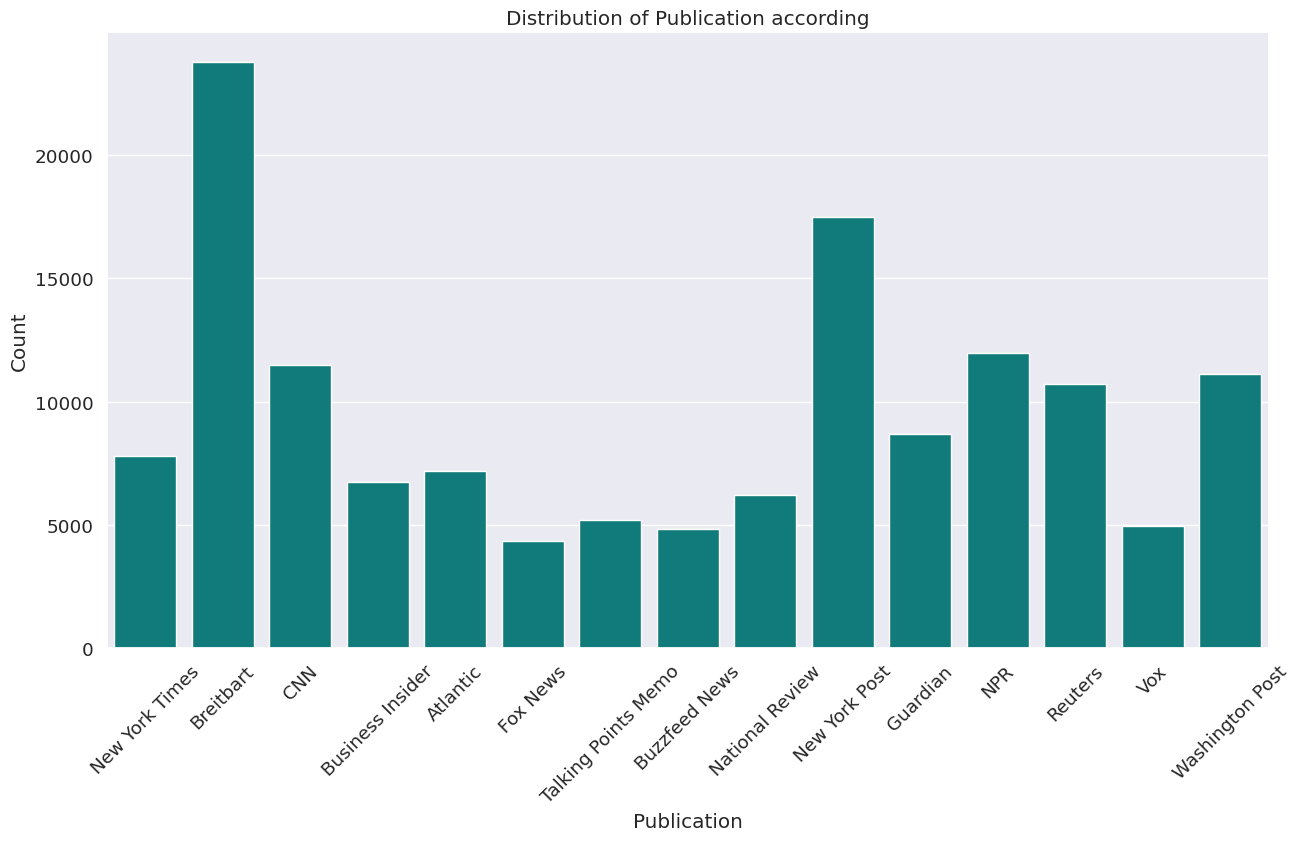

In [ ]:
# Countplot shows the distribution of Publication
plt.rcParams['figure.figsize'] = [15, 8]
sns.set(font_scale = 1.2, style = 'darkgrid')
sns_year = sns.countplot(x=df['publication'], color = 'darkcyan')
plt.xticks(rotation=45)
sns_year.set(xlabel = "Publication", ylabel = "Count", title = "Distribution of Publication according")

In [ ]:
# Replacing the unnecessary row value of year with it's actual values
df['year'] = df['year'].replace("https://www.washingtonpost.com/outlook/tale-of-a-woman-who-died-and-a-woman-who-killed-in-the-northern-ireland-conflict/2019/03/08/59e75dd4-2ecd-11e9-8ad3-9a5b113ecd3c_story.html", 2019)

In [ ]:
# Years
df['year'].value_counts()

2016.0    85405
2017.0    50404
2015.0     3705
2013.0      228
2014.0      125
2012.0       34
2011.0        8
2010.0        6
2008.0        3
2009.0        3
2004.0        2
2003.0        2
2005.0        2
2007.0        1
2000.0        1
Name: year, dtype: int64

[Text(0.5, 0, 'Year'),
 Text(0, 0.5, 'Count'),
 Text(0.5, 1.0, 'Distribution of the articles according to the year')]

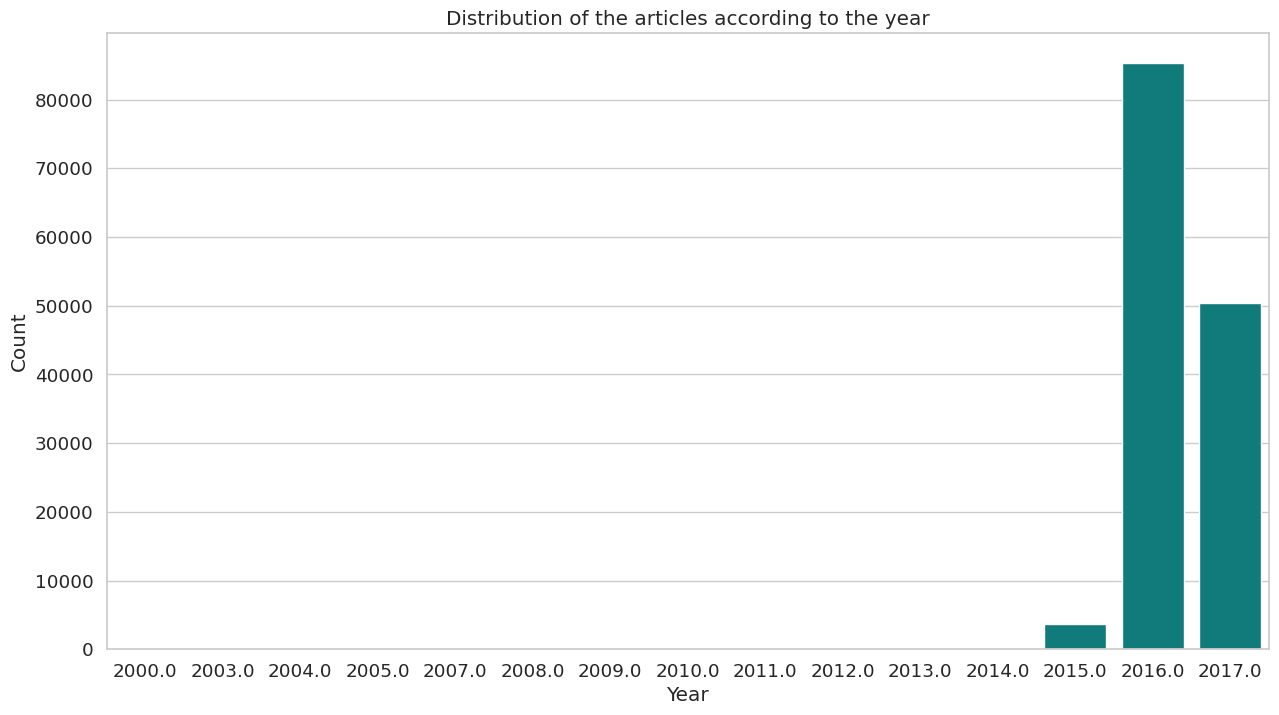

In [ ]:
# Countplot shows the distribution of the articles according to the year
plt.rcParams['figure.figsize'] = [15, 8]
sns.set(font_scale = 1.2, style = 'whitegrid')
sns_year = sns.countplot(x=df['year'], color = 'darkcyan')
sns_year.set(xlabel = "Year", ylabel = "Count", title = "Distribution of the articles according to the year")

In [ ]:
# Authors
df['author'].value_counts()

Breitbart News                                         1559
Pam Key                                                1282
Associated Press                                       1231
Charlie Spiering                                        928
Jerome Hudson                                           806
                                                       ... 
Laura Italiano, Sophia Rosenbaum and Philip Messing       1
Larry Celona, C.J. Sullivan and Daniel Prendergast        1
Krit McClean                                              1
Melissa Klein and Joe Tacopino                            1
John Yearwood                                             1
Name: author, Length: 15647, dtype: int64

[Text(0.5, 29.0, 'count'),
 Text(29.0, 0.5, 'author'),
 Text(0.5, 1.0, 'the most freq author')]

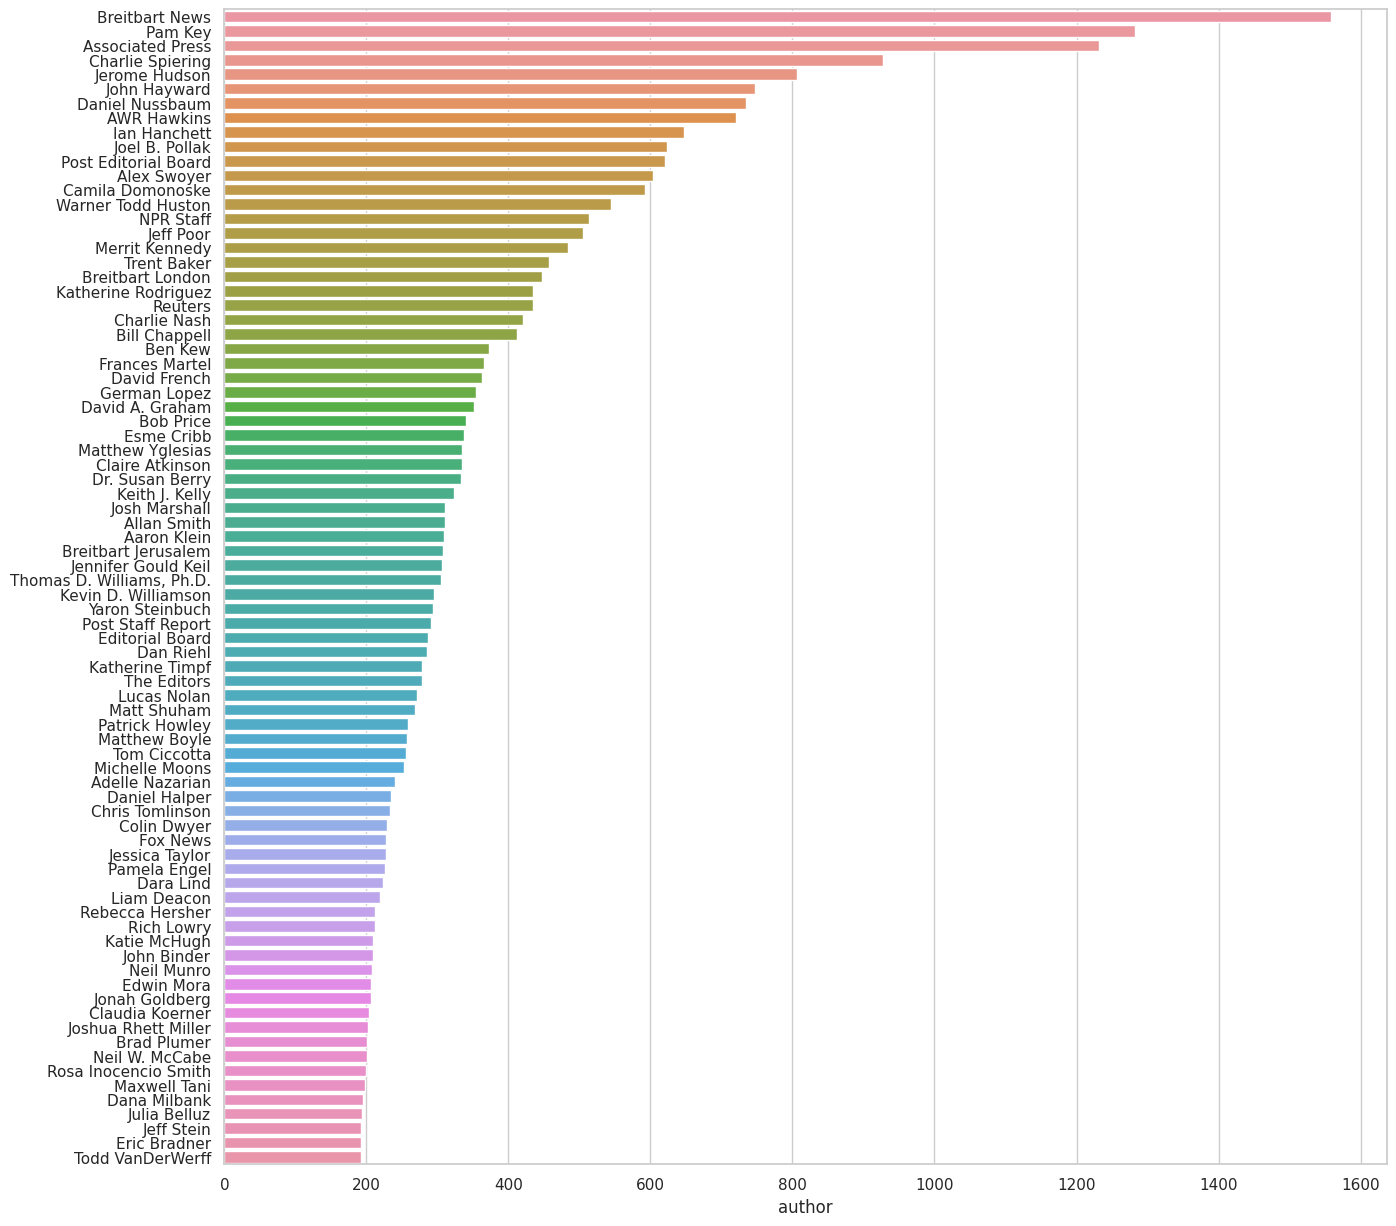

In [ ]:
# Countplot shows the distribution of author
plt.rcParams['figure.figsize'] = [15, 15]
sns.set(font_scale = 1, style = 'whitegrid')
df_author = df.author.value_counts().head(80)

sns.barplot(x=df_author, y=df_author.index)
sns_year.set(xlabel = "count", ylabel = "author", title = "the most freq author")

In [ ]:
# Changing the value "The Associated Press" to "Associated Press"
df['author'] = df['author'].replace("The Associated Press", "Associated Press")

In [ ]:
# Making one Dataframe by appending all of them for the further process
d = [df_1, df_2, df_3]
df = pd.concat(d, keys = ['x', 'y', 'z'])
df.rename(columns = {'content' : 'article'}, inplace = True);

In [ ]:
df.head()

Unnamed: 0     id                                              title  \
x 0           0  17283  House Republicans Fret About Winning Their Hea...   
  1           1  17284  Rift Between Officers and Residents as Killing...   
  2           2  17285  Tyrus Wong, ‘Bambi’ Artist Thwarted by Racial ...   
  3           3  17286  Among Deaths in 2016, a Heavy Toll in Pop Musi...   
  4           4  17287  Kim Jong-un Says North Korea Is Preparing to T...   

        publication                         author        date    year  month  \
x 0  New York Times                     Carl Hulse  2016-12-31  2016.0   12.0   
  1  New York Times  Benjamin Mueller and Al Baker  2017-06-19  2017.0    6.0   
  2  New York Times                   Margalit Fox  2017-01-06  2017.0    1.0   
  3  New York Times               William McDonald  2017-04-10  2017.0    4.0   
  4  New York Times                  Choe Sang-Hun  2017-01-02  2017.0    1.0   

     url                                            article  
x 0  NaN  WASHINGTON  —   Congressional Republicans have...  
  1  NaN  After the bullet shells get counted, the blood...  
  2  NaN  When Walt Disney’s “Bambi” opened in 1942, cri...  
  3  NaN  Death may be the great equalizer, but it isn’t...  
  4  NaN  SEOUL, South Korea  —   North Korea’s leader, ...

In [ ]:
# Dropping the unnecessary columns
df.drop(columns = ['Unnamed: 0', 'id', 'publication', 'author', 'date', 'year', 'month', 'url'], inplace = True)
df.head()

title  \
x 0  House Republicans Fret About Winning Their Hea...   
  1  Rift Between Officers and Residents as Killing...   
  2  Tyrus Wong, ‘Bambi’ Artist Thwarted by Racial ...   
  3  Among Deaths in 2016, a Heavy Toll in Pop Musi...   
  4  Kim Jong-un Says North Korea Is Preparing to T...   

                                               article  
x 0  WASHINGTON  —   Congressional Republicans have...  
  1  After the bullet shells get counted, the blood...  
  2  When Walt Disney’s “Bambi” opened in 1942, cri...  
  3  Death may be the great equalizer, but it isn’t...  
  4  SEOUL, South Korea  —   North Korea’s leader, ...

In [ ]:
df['title'] = df['title'].astype(str)
df['article'] = df['article'].astype(str)
#check the data info
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 142570 entries, ('x', 0) to ('z', 42570)
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   title    142570 non-null  object
 1   article  142570 non-null  object
dtypes: object(2)
memory usage: 4.2+ MB


In [ ]:
df_article = df[['article']].copy()
df_title = df[['title']].copy()

df_title.head()

title
x 0  House Republicans Fret About Winning Their Hea...
  1  Rift Between Officers and Residents as Killing...
  2  Tyrus Wong, ‘Bambi’ Artist Thwarted by Racial ...
  3  Among Deaths in 2016, a Heavy Toll in Pop Musi...
  4  Kim Jong-un Says North Korea Is Preparing to T...

In [ ]:
df_article.head()

article
x 0  WASHINGTON  —   Congressional Republicans have...
  1  After the bullet shells get counted, the blood...
  2  When Walt Disney’s “Bambi” opened in 1942, cri...
  3  Death may be the great equalizer, but it isn’t...
  4  SEOUL, South Korea  —   North Korea’s leader, ...

## Create labels with Snorkel

In [ ]:
title_sn = df_title.copy()
article_sn = df_article.copy()

In [ ]:
STATE = 1

def change_state():

  global STATE
  if STATE == 0:
    STATE = 1

  else:
    STATE = 0

  return STATE

In [ ]:
# FOR TITLE

#define constants to represent the class labels: positive, negative, and abstain
POSITIVE = 1
NEGATIVE = 0
ABSTAIN = -1

#define function which looks into the input words to represent a proper label
def keyword_lookup_t(x, keywords, label):
    if any(word in x.title.lower() for word in keywords):
        return label
    return ABSTAIN

#define function which assigns a correct label
def make_keyword_lf_t(keywords, label=POSITIVE):
    return LabelingFunction(
        name=f"keyword_{keywords[0]}",
        f=keyword_lookup_t,
        resources=dict(keywords=keywords, label=label))

#resource: https://www.snorkel.org/use-cases/01-spam-tutorial#3-writing-more-labeling-functions
#these two lists can be further extended

"""positive news might contain the following words' """
keyword_positive_t = make_keyword_lf_t(keywords=['boosts', 'great', 'develops', 'promising', 'ambitious', 'delighted', 'record', 'win', 'breakthrough', 'recover', 'achievement', 'peace', 'party', 'hope', 'flourish', 'respect', 'partnership', 'champion', 'positive', 'happy', 'bright', 'confident', 'encouraged', 'perfect', 'complete', 'assured' ])

"""negative news might contain the following words"""
keyword_negative_t = make_keyword_lf_t(keywords=['war','solidiers', 'turmoil', 'injur','trouble', 'aggressive', 'killed', 'coup', 'evasion', 'strike', 'troops', 'dismisses', 'attacks', 'defeat', 'damage', 'dishonest', 'dead', 'fear', 'foul', 'fails', 'hostile', 'cuts', 'accusations', 'victims',  'death', 'unrest', 'fraud', 'dispute', 'destruction', 'battle', 'unhappy', 'bad', 'alarming', 'angry', 'anxious', 'dirty', 'pain', 'poison', 'unfair', 'unhealthy'
                                              ], label=NEGATIVE)

#set up a preprocessor function to determine polarity & subjectivity using textlob pretrained classifier
@preprocessor(memoize=True)
def textblob_sentiment(x):

    if (STATE == 1):
      scores = TextBlob(x.title)
      x.polarity = scores.sentiment.polarity
      x.subjectivity = scores.sentiment.subjectivity
      return x

    if (STATE == 0):
      scores = TextBlob(x.article)
      x.polarity = scores.sentiment.polarity
      x.subjectivity = scores.sentiment.subjectivity
      return x

#find polarity
@labeling_function(pre=[textblob_sentiment])
def textblob_polarity_t(x):
    return POSITIVE if x.polarity > 0.6 else ABSTAIN

#find subjectivity
@labeling_function(pre=[textblob_sentiment])
def textblob_subjectivity_t(x):
    return POSITIVE if x.subjectivity >= 0.5 else ABSTAIN

In [ ]:
# FOR ARTICLE

#define function which looks into the input words to represent a proper label
def keyword_lookup_a(x, keywords, label):
    if any(word in x.article.lower() for word in keywords):
        return label
    return ABSTAIN

#define function which assigns a correct label
def make_keyword_lf_a(keywords, label=POSITIVE):
    return LabelingFunction(
        name=f"keyword_{keywords[0]}",
        f=keyword_lookup_a,
        resources=dict(keywords=keywords, label=label))

#resource: https://www.snorkel.org/use-cases/01-spam-tutorial#3-writing-more-labeling-functions
#these two lists can be further extended

"""positive news might contain the following words' """
keyword_positive_a = make_keyword_lf_a(keywords=['boosts', 'great', 'develops', 'promising', 'ambitious', 'delighted', 'record', 'win', 'breakthrough', 'recover', 'achievement', 'peace', 'party', 'hope', 'flourish', 'respect', 'partnership', 'champion', 'positive', 'happy', 'bright', 'confident', 'encouraged', 'perfect', 'complete', 'assured' ])

"""negative news might contain the following words"""
keyword_negative_a = make_keyword_lf_a(keywords=['war','solidiers', 'turmoil', 'injur','trouble', 'aggressive', 'killed', 'coup', 'evasion', 'strike', 'troops', 'dismisses', 'attacks', 'defeat', 'damage', 'dishonest', 'dead', 'fear', 'foul', 'fails', 'hostile', 'cuts', 'accusations', 'victims',  'death', 'unrest', 'fraud', 'dispute', 'destruction', 'battle', 'unhappy', 'bad', 'alarming', 'angry', 'anxious', 'dirty', 'pain', 'poison', 'unfair', 'unhealthy'
                                              ], label=NEGATIVE)

#find polarity
@labeling_function(pre=[textblob_sentiment])
def textblob_polarity_a(x):
    return POSITIVE if x.polarity > 0.6 else ABSTAIN

#find subjectivity
@labeling_function(pre=[textblob_sentiment])
def textblob_subjectivity_a(x):
    return POSITIVE if x.subjectivity >= 0.5 else ABSTAIN

In [ ]:
#combine all the labeling functions
lfs_t = [keyword_positive_t, keyword_negative_t, textblob_polarity_t, textblob_subjectivity_t]
lfs_a = [keyword_positive_a, keyword_negative_a, textblob_polarity_t, textblob_subjectivity_t]

#apply the lfs on the dataframe
applier_t = PandasLFApplier(lfs=lfs_t)
applier_a = PandasLFApplier(lfs=lfs_a)

L_snorkel_t = applier_t.apply(df=title_sn)
change_state()
L_snorkel_a = applier_a.apply(df=article_sn)
change_state()

#apply the label model
label_model_t = LabelModel(cardinality=2, verbose=True)
label_model_a = LabelModel(cardinality=2, verbose=True)

#fit on the data
label_model_t.fit(L_snorkel_t)
label_model_a.fit(L_snorkel_a)

#predict and create the labels
title_sn["label"] = label_model_t.predict(L=L_snorkel_t)
article_sn["label"] = label_model_a.predict(L=L_snorkel_a)

#Filtering out unlabeled data points
title_sn_fin = title_sn.loc[title_sn.label.isin([0,1]), :]
article_sn_fin = article_sn.loc[article_sn.label.isin([0,1]), :]

#find the label counts
print(title_sn['label'].value_counts())
print(article_sn['label'].value_counts())

100%|██████████| 100/100 [00:00<00:00, 1027.14epoch/s]


-1    90641
 1    40367
 0    11562
Name: label, dtype: int64
 0    121086
 1     13496
-1      7988
Name: label, dtype: int64


In [ ]:
print(title_sn_fin['label'].value_counts())
print(article_sn_fin['label'].value_counts())

1    40367
0    11562
Name: label, dtype: int64
0    121086
1     13496
Name: label, dtype: int64


In [ ]:
#headline is positive (1) or negative (0)
title_sn.head()

title  label
x 0  House Republicans Fret About Winning Their Hea...      1
  1  Rift Between Officers and Residents as Killing...     -1
  2  Tyrus Wong, ‘Bambi’ Artist Thwarted by Racial ...      0
  3  Among Deaths in 2016, a Heavy Toll in Pop Musi...      0
  4  Kim Jong-un Says North Korea Is Preparing to T...     -1

In [ ]:
title_sn_fin.head()

title  label
x 0   House Republicans Fret About Winning Their Hea...      1
  2   Tyrus Wong, ‘Bambi’ Artist Thwarted by Racial ...      0
  3   Among Deaths in 2016, a Heavy Toll in Pop Musi...      0
  5   Sick With a Cold, Queen Elizabeth Misses New Y...      1
  10  Weak Federal Powers Could Limit Trump’s Climat...      1

In [ ]:
article_sn.head()

article  label
x 0  WASHINGTON  —   Congressional Republicans have...      0
  1  After the bullet shells get counted, the blood...      0
  2  When Walt Disney’s “Bambi” opened in 1942, cri...      0
  3  Death may be the great equalizer, but it isn’t...      0
  4  SEOUL, South Korea  —   North Korea’s leader, ...      0

In [ ]:
article_sn_fin.head()

article  label
x 0  WASHINGTON  —   Congressional Republicans have...      0
  1  After the bullet shells get counted, the blood...      0
  2  When Walt Disney’s “Bambi” opened in 1942, cri...      0
  3  Death may be the great equalizer, but it isn’t...      0
  4  SEOUL, South Korea  —   North Korea’s leader, ...      0

Not good enough to label full articles

## Manually labeling using Dictionaries

In [ ]:
title_di = df_title.copy()
article_di = df_article.copy()

In [ ]:
!cp /content/drive/MyDrive/info/dictionary.py .
import dictionary

In [ ]:
# from https://inquirer.sites.fas.harvard.edu/spreadsheet_guide.htm
gi_dict_path = "/content/drive/MyDrive/info/gi_dictionary.csv"

gi_df = pd.read_csv(gi_dict_path)

gi_df.head()

<ipython-input-89-6d358ba55861>:4: DtypeWarning: Columns (63,108,109,110,176) have mixed types. Specify dtype option on import or set low_memory=False.
  gi_df = pd.read_csv(gi_dict_path)


,Entry,Source,Positiv,Negativ,Pstv,Affil,Ngtv,Hostile,Strong,Power,...,Anomie,NegAff,PosAff,SureLw,If,NotLw,TimeSpc,FormLw,Othtags,Defined
0,A,H4Lvd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DET ART,| article: Indefinite singular article--some o...
1,ABANDON,H4Lvd,NaN,Negativ,NaN,NaN,Ngtv,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SUPV,|
2,ABANDONMENT,H4,NaN,Negativ,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Noun,|
3,ABATE,H4Lvd,NaN,Negativ,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SUPV,|
4,ABATEMENT,Lvd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Noun,NaN


In [ ]:
gi_pos_tmp = gi_df[['Entry', 'Positiv']].copy()
gi_neg_tmp = gi_df[['Entry', 'Negativ']].copy()

gi_pos_tmp.head()

,Entry,Positiv
0,A,NaN
1,ABANDON,NaN
2,ABANDONMENT,NaN
3,ABATE,NaN
4,ABATEMENT,NaN


In [ ]:
gi_neg_tmp.head()

,Entry,Negativ
0,A,NaN
1,ABANDON,Negativ
2,ABANDONMENT,Negativ
3,ABATE,Negativ
4,ABATEMENT,NaN


In [ ]:
mask_pos = gi_pos_tmp['Positiv'].isnull()
mask_neg = gi_neg_tmp['Negativ'].isnull()

gi_pos = gi_pos_tmp[~mask_pos]
gi_neg = gi_neg_tmp[~mask_neg]

gi_pos.head()

,Entry,Positiv
7,ABIDE,Positiv
8,ABILITY,Positiv
10,ABLE,Positiv
17,ABOUND,Positiv
40,ABSOLVE,Positiv


In [ ]:
gi_neg.head()

,Entry,Negativ
1,ABANDON,Negativ
2,ABANDONMENT,Negativ
3,ABATE,Negativ
5,ABDICATE,Negativ
6,ABHOR,Negativ


In [ ]:
import os

#import Load_MasterDictionary as MD ## LM Dictionary
file_path = ('/content/drive/MyDrive/info/Loughran-McDonald_MasterDictionary_1993-2021.csv')

md, header, sent_cat, sent_dict, stopwords, total_doc = dictionary.load_masterdictionary(file_path, get_other = True)

## Convert the LM Dictionary into positive/negative word lists
positive = []
negative = []
for sent, value in sent_dict.items():
    if sent == "negative" or sent == "uncertainty":
        for word in value.keys():
            negative.append(word.lower())
            #print(negative)
    elif sent == "positive" :
        for word in value.keys():
            positive.append(word.lower())
            #print(positive)

## GI Dictionary
gi_pos_list = list(gi_pos['Entry'])
gi_neg_list = list(gi_neg['Entry'])

In [ ]:
print(gi_pos_list)

['ABIDE', 'ABILITY', 'ABLE', 'ABOUND', 'ABSOLVE', 'ABSORBENT', 'ABSORPTION', 'ABUNDANCE', 'ABUNDANT', 'ACCEDE', 'ACCENTUATE', 'ACCEPT', 'ACCEPTABLE', 'ACCEPTANCE', 'ACCESSIBLE', 'ACCESSION', 'ACCLAIM', 'ACCLAMATION', 'ACCOLADE', 'ACCOMMODATE', 'ACCOMMODATION', 'ACCOMPANIMENT', 'ACCOMPLISH', 'ACCOMPLISHMENT', 'ACCORD#2', 'ACCORD#3', 'ACCORD#5', 'ACCORDANCE', 'ACCOUNTABLE', 'ACCRUE', 'ACCURACY', 'ACCURATE', 'ACCURATENESS', 'ACHIEVE', 'ACHIEVEMENT', 'ACKNOWLEDGEMENT', 'ACQUAINT', 'ACQUAINTANCE', 'ACQUIT', 'ACQUITTAL', 'ACTUAL#1', 'ACTUAL#2', 'ACTUALITY', 'ADAMANT', 'ADAPTABILITY', 'ADAPTABLE', 'ADAPTATION', 'ADAPTIVE', 'ADEPT', 'ADEPTNESS', 'ADEQUATE', 'ADHERENCE', 'ADHERENT', 'ADHESION', 'ADHESIVE', 'ADJUNCT', 'ADJUST#2', 'ADJUSTABLE', 'ADJUSTMENT', 'ADMIRABLE', 'ADMIRATION', 'ADMIRE', 'ADMIRER', 'ADMIT#1', 'ADMIT#2', 'ADMIT#3', 'ADMITTANCE', 'ADORABLE', 'ADORE', 'ADORN', 'ADORNMENT', 'ADROIT', 'ADROITLY', 'ADULATION', 'ADULT#2', 'ADVANCE#1', 'ADVANCE#2', 'ADVANCE#3', 'ADVANCEMENT', 'ADV

In [ ]:
print(gi_neg_list)

['ABANDON', 'ABANDONMENT', 'ABATE', 'ABDICATE', 'ABHOR', 'ABJECT', 'ABNORMAL', 'ABOLISH', 'ABOMINABLE', 'ABRASIVE', 'ABRUPT', 'ABSCOND', 'ABSENCE', 'ABSENT#1', 'ABSENT-MINDED', 'ABSENTEE', 'ABSURD', 'ABSURDITY', 'ABUSE#1', 'ABUSE#2', 'ABYSS', 'ACCIDENT', 'ACCOST', 'ACCURSED', 'ACCUSATION', 'ACCUSE#1', 'ACCUSE#2', 'ACHE', 'ACRIMONIOUS', 'ACRIMONY', 'ADDICT', 'ADDICTION', 'ADMONISH', 'ADMONITION', 'ADULTERATE', 'ADULTERATION', 'ADULTERY', 'ADVERSARY', 'ADVERSE', 'ADVERSITY', 'AFFECTATION', 'AFFLICT', 'AFFLICTION', 'AFRAID#2', 'AGAINST', 'AGGRAVATE', 'AGGRAVATION', 'AGGRESSION', 'AGGRESSIVE', 'AGGRESSIVENESS', 'AGGRESSOR', 'AGGRIEVE', 'AGHAST', 'AGITATE', 'AGITATION', 'AGITATOR', 'AGONIZE', 'AGONY', 'AIL', 'AILMENT', 'AIMLESS', 'ALARM#2', 'ALARMING', 'ALAS', 'ALIBI', 'ALIEN', 'ALIENATE', 'ALIENATION', 'ALLEGATION', 'ALLEGE', 'ALOOF', 'ALTERCATION', 'AMBIGUITY', 'AMBIGUOUS', 'AMBIVALENT', 'AMBUSH#1', 'AMBUSH#2', 'AMISS', 'AMPUTATE', 'ANARCHIST', 'ANARCHY', 'ANGER#1', 'ANGER#2', 'ANGRY', 'A

In [ ]:
## Extra words defined by the user to be relevant in the analysis
positive_extra = [r"[bB]ull", "positive", "rise", "stock", "high", "up", "climb", "buy", "surge", "recover",
                  "soar", "up", "blue", "chip"]
negative_extra = [r'[bB]ear', "negative", "drop", "fall", "low",
                  "burst", "tight", "bubble", "crash", "down", "slide", "sell", "plunge", "dive",
                  "stagflation", "recession", "slow", "inflation", "down"]

## Combine all lists into a single list
positive += (positive_extra + gi_pos_list)
negative += (negative_extra + gi_neg_list)

## Remove duplicates and convert to a final list
positive_words = list(set(positive))
negative_words = list(set(negative))

In [ ]:
print(positive_words)

['alliances', 'RESPECTFUL', 'successful', 'TROPHY', 'IMPROVEMENT', 'ACCOMMODATE', 'DECORATE', 'ELEGANCE', 'THOROUGH', 'ANGELIC', 'boom', 'BEFRIEND', 'DEVOUT', 'PERTINENT', 'RESTORATION', 'ASSENT', 'PLAUSIBILITY', 'MATTER#4', 'favoring', 'beautifully', 'exclusivity', 'ENSEMBLE', 'REVERENTLY', 'BROTHERLY', 'HEROIC', 'exemplary', 'SYMPATHIZE', 'ADJUSTABLE', 'WORTHY', 'FARSIGHTED', 'rise', 'CIVILIZE#2', 'GROOM', 'SENSE#5', 'COMMODIOUS', 'STATELY', 'INTELLECTUAL#2', 'MERCIFUL', 'SANITY', 'regained', 'JOKE#2', 'CONSCIENTIOUS', 'NICE#1', 'WOO', 'prosperity', 'TOLERATE', 'bolsters', 'EMPOWER', 'RICH#4', 'LAUGH#1', 'AFFECTION', 'PROFESS', 'COOPERATION', 'GENUINE', 'ALLEGIANCE', 'RESOLUTE', 'LUXURY', 'LEARN#2', 'BEST', 'DILIGENT', 'LIFELONG', 'CLOSENESS', 'PRO', 'CONSIDERATION#1', 'COMPLIANCE', 'FOREMOST', 'preeminence', 'SUBSCRIBE', 'preeminent', 'OPPORTUNITY', 'COMPLETENESS', 'HERO', 'EXTRAVAGANCE', 'IMAGINATIVE', 'satisfying', 'RENAISSANCE', 'REAL#1', 'COMICAL', 'GIFT', 'THOUGHTFULNESS', 'PAI

In [ ]:
print(negative_words)

['destroyed', 'PROCRASTINATION', 'DISCREPANT', 'plaintiffs', 'BOUT', 'SICK#2', 'CONTRADICTION', 'PESSIMISM', 'unsaleable', 'distracting', 'renegotiating', 'overdue', 'WITHHELD', 'RATTLE#2', 'knowingly', 'SCHEME#1', 'unreasonable', 'UNSATISFACTORY', 'DIFFICULTY', 'faults', 'disapprovals', 'CONCERN#1', 'COMPLAIN', 'disgorgements', 'defaulted', 'impending', 'SCAR', 'SCORCH', 'INFECTION', 'disappointing', 'PRISON#1', 'curtails', 'inconsistent', 'WRONGFUL', 'closeout', 'burned', 'forbidding', 'BROKE#7', 'UNDEPENDABILITY', 'FIERCE', 'TIRE#2', 'confinement', 'nullification', 'BEHEAD', 'corruptions', 'disgorge', 'expropriates', 'probabilistic', 'TREASON', 'interrupts', 'LIMIT#3', 'UNTRUE', 'misstates', 'CONSTRAINT', 'QUARREL#2', 'forced', 'discontinuations', 'violative', 'unknowns', 'depressed', 'frustrating', 'ambiguous', 'SLANDEROUS', 'SLUGGISH', 'cutback', 'distraction', 'firing', 'overturns', 'HORROR', 'CARELESSNESS', 'mismatching', 'anticipates', 'HUNT#2', 'cautionary', 'HEINOUS', 'EMBARR

In [ ]:
len(positive_words)

2281

In [ ]:
len(negative_words)

4918

In [ ]:
title_di.head()

title
x 0  House Republicans Fret About Winning Their Hea...
  1  Rift Between Officers and Residents as Killing...
  2  Tyrus Wong, ‘Bambi’ Artist Thwarted by Racial ...
  3  Among Deaths in 2016, a Heavy Toll in Pop Musi...
  4  Kim Jong-un Says North Korea Is Preparing to T...

In [ ]:
labels = []
count = 0

for index, row in title_di.iterrows():
    #print(row['title'])
    count += 1
    label_tmp = []
    for word in row['title']:
      if word in positive_words:
        label_tmp.append(1)
      elif word in negative_words:
        label_tmp.append(0)
      else:
        label_tmp.append(-1)

    pos = label_tmp.count(1)
    neg = label_tmp.count(0)
    neu = label_tmp.count(-1)
    print(label_tmp)

    total = len(label_tmp)
    pos_score = pos/total
    neg_score = neg/total
    neu_score = neu/total

    score = max([pos_score, neg_score])
    print(score)

    #if pos > neg:
      #labels.append(1)
    #elif neg > pos:
      #labels.append(0)
    #else:
      #labels.append(-1)

    if neg_score > pos_score:
        score = -score
        labels.append(score)

    if count == 5:
      break

print(labels)

#title_di['label'] = labels

#title_di.head()

[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
0.0
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
0.0
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -

In [ ]:
print(title_di['label'].value_counts())

In [ ]:
labels = []

for index, row in article_di.iterrows():
    print(row['article'])
    for word in row['article']:
      if word in positive_words:
        labels.append(1)
      elif word in negative_words:
        labels.append(0)
      else:
        labels.append(-1)

article_di['label'] = labels

article_di.head()

## Labeling with TextBlob

In [ ]:
title_tb = df_title.copy()
article_tb = df_article.copy()

In [ ]:
polar = []

for index, row in article_tb.iterrows():
    #print(row['article'])
    textBlob = TextBlob(row['article'])
    polar.append(textBlob.polarity * textBlob.subjectivity)

article_tb['label'] = polar

article_tb.head()

article     label
x 0  WASHINGTON  —   Congressional Republicans have...  0.013139
  1  After the bullet shells get counted, the blood... -0.000686
  2  When Walt Disney’s “Bambi” opened in 1942, cri...  0.029655
  3  Death may be the great equalizer, but it isn’t...  0.056545
  4  SEOUL, South Korea  —   North Korea’s leader, ...  0.096797

In [ ]:
polar = []

for index, row in title_tb.iterrows():
    #print(row['title'])
    textBlob = TextBlob(row['title'])
    polar.append(textBlob.polarity * textBlob.subjectivity)

title_tb['label'] = polar

title_tb.head()

title     label
x 0  House Republicans Fret About Winning Their Hea...  0.191632
  1  Rift Between Officers and Residents as Killing...  0.061983
  2  Tyrus Wong, ‘Bambi’ Artist Thwarted by Racial ...  0.061983
  3  Among Deaths in 2016, a Heavy Toll in Pop Musi... -0.015186
  4  Kim Jong-un Says North Korea Is Preparing to T...  0.061983

## Labeling with Vader

In [ ]:
!pip install vaderSentiment

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 11.1 MB/s eta 0:00:00


In [ ]:
title_va = df_title.copy()
article_va = df_article.copy()

In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

## Function to print sentiments of the sentence.
def get_vader_scores(text):
    # Create a SentimentIntensityAnalyzer object.
    sid_obj = SentimentIntensityAnalyzer()
    sentiment_dict = sid_obj.polarity_scores(text)
    comp_score = sentiment_dict['compound']
    return comp_score

vader = []

for index, row in title_va.iterrows():
    vader.append(get_vader_scores(row['title']))

title_va['label'] = vader

title_va.head()

title   label
x 0  House Republicans Fret About Winning Their Hea...  0.7650
  1  Rift Between Officers and Residents as Killing... -0.6705
  2  Tyrus Wong, ‘Bambi’ Artist Thwarted by Racial ... -0.1280
  3  Among Deaths in 2016, a Heavy Toll in Pop Musi...  0.0000
  4  Kim Jong-un Says North Korea Is Preparing to T...  0.0000

In [ ]:
# runs 2 hrs
vader = []

for index, row in article_va.iterrows():
    vader.append(get_vader_scores(row['article']))

article_va['label'] = vader

article_va.head()

article   label
x 0  WASHINGTON  —   Congressional Republicans have...  0.3137
  1  After the bullet shells get counted, the blood... -1.0000
  2  When Walt Disney’s “Bambi” opened in 1942, cri...  0.9960
  3  Death may be the great equalizer, but it isn’t...  0.8939
  4  SEOUL, South Korea  —   North Korea’s leader, ...  0.9864

## All labels

In [ ]:
title_ll = df_title.copy()
article_ll = df_article.copy()

In [ ]:
t_sn_column = title_sn["label"]
a_sn_column = article_sn["label"]

# need to preprocess text and lists first
#t_di_column = title_di["label"]
#a_di_column = article_sn["label"]

t_tb_column = title_tb["label"]
a_tb_column = article_tb["label"]

t_va_column = title_va["label"]
a_va_column = article_va["label"]

In [ ]:
title_ll = pd.concat([title_ll, t_sn_column], axis=1)
title_ll.rename(columns = {'label' : 'label_sn'}, inplace = True)
#title_ll = pd.concat([title_ll, t_di_column], axis=1)
#title_ll.rename(columns = {'label' : 'label_di'}, inplace = True)
title_ll = pd.concat([title_ll, t_tb_column], axis=1)
title_ll.rename(columns = {'label' : 'label_tb'}, inplace = True)
title_ll = pd.concat([title_ll, t_va_column], axis=1)
title_ll.rename(columns = {'label' : 'label_va'}, inplace = True)

title_ll.head()

title  label_sn  label_tb  \
x 0  House Republicans Fret About Winning Their Hea...         1  0.191632   
  1  Rift Between Officers and Residents as Killing...        -1  0.061983   
  2  Tyrus Wong, ‘Bambi’ Artist Thwarted by Racial ...         0  0.061983   
  3  Among Deaths in 2016, a Heavy Toll in Pop Musi...         0 -0.015186   
  4  Kim Jong-un Says North Korea Is Preparing to T...        -1  0.061983   

     label_va  
x 0    0.7650  
  1   -0.6705  
  2   -0.1280  
  3    0.0000  
  4    0.0000

In [ ]:
article_ll = pd.concat([article_ll, a_sn_column], axis=1)
article_ll.rename(columns = {'label' : 'label_sn'}, inplace = True)
#article_ll = pd.concat([article_ll, a_di_column], axis=1)
#article_ll.rename(columns = {'label' : 'label_di'}, inplace = True)
article_ll = pd.concat([article_ll, a_tb_column], axis=1)
article_ll.rename(columns = {'label' : 'label_tb'}, inplace = True)
article_ll = pd.concat([article_ll, a_va_column], axis=1)
article_ll.rename(columns = {'label' : 'label_va'}, inplace = True)

article_ll.head()

article  label_sn  label_tb  \
x 0  WASHINGTON  —   Congressional Republicans have...         0  0.013139   
  1  After the bullet shells get counted, the blood...         0 -0.000686   
  2  When Walt Disney’s “Bambi” opened in 1942, cri...         0  0.029655   
  3  Death may be the great equalizer, but it isn’t...         0  0.056545   
  4  SEOUL, South Korea  —   North Korea’s leader, ...         0  0.096797   

     label_va  
x 0    0.3137  
  1   -1.0000  
  2    0.9960  
  3    0.8939  
  4    0.9864

In [ ]:
article_ll.to_csv("/content/drive/MyDrive/info/article_df.csv", sep='\t')

In [ ]:
title_ll.to_csv("/content/drive/MyDrive/info/title_df.csv", sep='\t')

# Text Processing

In [ ]:
title_tt = df_title.copy()
article_tt = df_article.copy()

In [ ]:
from nltk.stem import WordNetLemmatizer  # lemmatization
import nltk
nltk.download('wordnet')

# IMPROVED
def pre_process(text):

    # take care of punction
    text = re.sub(r"([.,;:!?'\"“\(\)])(\w)", r"\1 \2", text) # when at the beginning of a string, separate punctuation
    text = re.sub(r"(\w)([.,;:!?'\"”\)])", r"\1 \2", text) # when at the end of a string, separate punctuation

    # remove any numbers
    numbers = r'\d+'
    text = re.sub(pattern=numbers, repl=" ", string=text)

    # split the string into separate tokens
    tokens = re.split(r"\s+",text)


    # normalise all words into lowercase
    final = [t.lower() for t in tokens]


    tokens = []

    # remove any strings signalising end of line
    for i in range(len(final)):
        if final[i] != '_eol_':
            tokens.append(final[i])

    # remove any unncessary punctuation connected to words
    x = '[{}]'.format(re.escape(string.punctuation)+'\…').replace("...", "").replace("\-", "")
    pattern = re.compile(x)
    tokens = [f for f in filter(None, [pattern.sub('', token) for token in tokens])]

    # remove stop words
    stopwords = nltk.corpus.stopwords.words('english')
    tokens = [token for token in tokens if token not in stopwords]

    # apply lemmatisation
    lemmatiser = WordNetLemmatizer()
    tokens = [lemmatiser.lemmatize(token) for token in tokens]


    # return final list of tokens
    return tokens

[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
# TEST
text_test = "I have the high ground, Anakin!"
tokens_test = pre_process(text_test)
print(tokens_test)

['high', 'ground', 'anakin']


In [ ]:
tokenised = ['']*142570
article_tt['tokenised'] = tokenised

for index, row in article_tt.iterrows():
  token = []
  token = pre_process(row['article'])
  article_tt.loc[index, 'tokenised'] = token

article_tt.head()

In [ ]:
article_tt.head()

article  \
x 0  WASHINGTON  —   Congressional Republicans have...   
  1  After the bullet shells get counted, the blood...   
  2  When Walt Disney’s “Bambi” opened in 1942, cri...   
  3  Death may be the great equalizer, but it isn’t...   
  4  SEOUL, South Korea  —   North Korea’s leader, ...   

                                             tokenised  
x 0  [washington, —, congressional, republican, new...  
  1  [bullet, shell, get, counted, blood, dry, voti...  
  2  [walt, disney’s, “, bambi, ”, opened, critic, ...  
  3  [death, may, great, equalizer, isn’t, necessar...  
  4  [seoul, south, korea, —, north, korea’s, leade...

In [ ]:
tokenised = ['']*142570
title_tt['tokenised'] = tokenised

for index, row in title_tt.iterrows():
  token = []
  token = pre_process(row['title'])
  title_tt.loc[index, 'tokenised'] = token

title_tt.head()

title  \
x 0  House Republicans Fret About Winning Their Hea...   
  1  Rift Between Officers and Residents as Killing...   
  2  Tyrus Wong, ‘Bambi’ Artist Thwarted by Racial ...   
  3  Among Deaths in 2016, a Heavy Toll in Pop Musi...   
  4  Kim Jong-un Says North Korea Is Preparing to T...   

                                             tokenised  
x 0  [house, republican, fret, winning, health, car...  
  1  [rift, officer, resident, killing, persist, so...  
  2  [tyrus, wong, ‘bambi’, artist, thwarted, racia...  
  3  [among, death, heavy, toll, pop, music, new, y...  
  4  [kim, jongun, say, north, korea, preparing, te...